In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Dateien laden (Pfad anpassen falls nötig)
ai_data = pd.read_csv("ai_labelled.csv")
human_data = pd.read_csv("human_labelled.csv", sep=";")  # Falls ";" als Trennzeichen genutzt wird

In [25]:
# Abschnitt 2: Datenvorbereitung

# Spalten definieren
age_column = "Wie alt sind Sie?"
credibility_columns = [col for col in ai_data.columns if 'Wie glaubwürdig fanden Sie den Text' in col]  # Alle Glaubwürdigkeits-Spalten finden

# Alter in numerisches Format umwandeln (Fehlwerte ignorieren)
ai_data[age_column] = pd.to_numeric(ai_data[age_column], errors='coerce')
human_data[age_column] = pd.to_numeric(human_data[age_column], errors='coerce')

# Glaubwürdigkeitsbewertung in numerisches Format umwandeln (Für jede Glaubwürdigkeits-Spalte)
for column in credibility_columns:
    ai_data[column] = pd.to_numeric(ai_data[column], errors='coerce')
    human_data[column] = pd.to_numeric(human_data[column], errors='coerce')


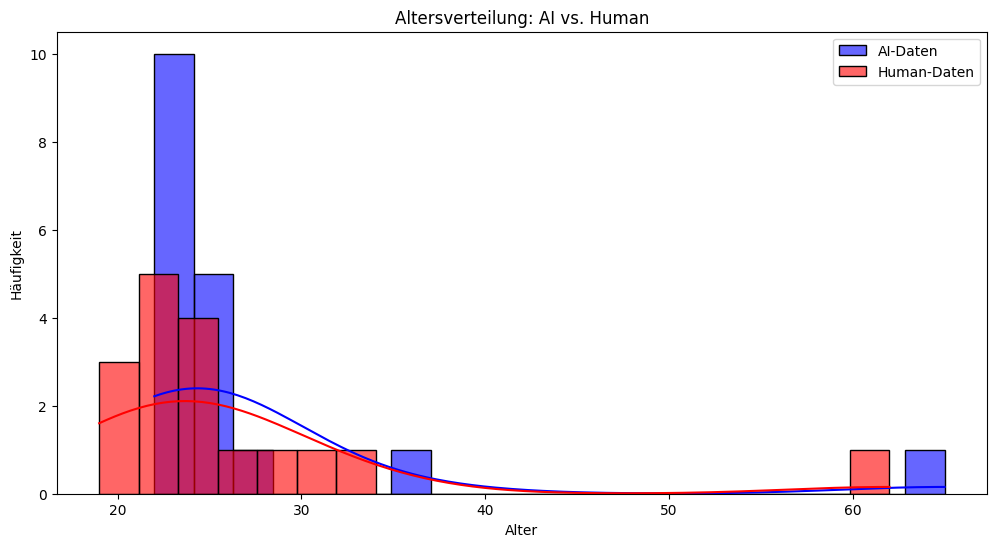

In [ ]:
# Abschnitt 3: Explorative Datenanalyse

# Altersstatistik ausgeben
print("\n📊 **AI-Daten Altersstatistik**")
print(ai_data[age_column].describe())

print("\n📊 **Human-Daten Altersstatistik**")
print(human_data[age_column].describe())

# Histogramm der Altersverteilung
plt.figure(figsize=(12, 6))
sns.histplot(ai_data[age_column], bins=20, kde=True, label="AI-Daten", color="blue", alpha=0.6)
sns.histplot(human_data[age_column], bins=20, kde=True, label="Human-Daten", color="red", alpha=0.6)
plt.legend()
plt.xlabel("Alter")
plt.ylabel("Häufigkeit")
plt.title("Altersverteilung: AI vs. Human")
plt.show()

# Unplausible Alterswerte finden (<10 oder >100 Jahre)
ai_outliers = ai_data[(ai_data[age_column] < 10) | (ai_data[age_column] > 100)]
human_outliers = human_data[(human_data[age_column] < 10) | (human_data[age_column] > 100)]

print("\n⚠️ **Unplausible Werte in AI-Daten:**")
print(ai_outliers[[age_column]])

print("\n⚠️ **Unplausible Werte in Human-Daten:**")
print(human_outliers[[age_column]])


In [27]:
# Abschnitt 4: Korrelationen berechnen

# Korrelation zwischen Alter und Glaubwürdigkeit für jede Glaubwürdigkeits-Spalte
for column in credibility_columns:
    ai_corr = ai_data[[age_column, column]].corr().iloc[0, 1]
    human_corr = human_data[[age_column, column]].corr().iloc[0, 1]

    print(f"\n📈 **Korrelation Alter vs. Glaubwürdigkeit ({column}) (AI-Daten):** {ai_corr:.2f}")
    print(f"📈 **Korrelation Alter vs. Glaubwürdigkeit ({column}) (Human-Daten):** {human_corr:.2f}")



📈 **Korrelation Alter vs. Glaubwürdigkeit (Geld - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):** 0.20
📈 **Korrelation Alter vs. Glaubwürdigkeit (Geld - 2. Wie glaubwürdig fanden Sie den Text ?) (Human-Daten):** 0.17

📈 **Korrelation Alter vs. Glaubwürdigkeit (Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):** 0.22
📈 **Korrelation Alter vs. Glaubwürdigkeit (Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?) (Human-Daten):** -0.40

📈 **Korrelation Alter vs. Glaubwürdigkeit (Sport - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):** -0.23
📈 **Korrelation Alter vs. Glaubwürdigkeit (Sport - 2. Wie glaubwürdig fanden Sie den Text ?) (Human-Daten):** -0.10

📈 **Korrelation Alter vs. Glaubwürdigkeit (Wissen - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):** 0.05
📈 **Korrelation Alter vs. Glaubwürdigkeit (Wissen - 2. Wie glaubwürdig fanden Sie den Text ?) (Human-Daten):** 0.20


In [31]:
# Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe berechnen
ai_mean_credibility = ai_data.groupby("Altersgruppe")[credibility_columns].mean()
human_mean_credibility = human_data.groupby("Altersgruppe")[credibility_columns].mean()

print("\n📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (AI-Daten):**")
print(ai_mean_credibility)

print("\n📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (Human-Daten):**")
print(human_mean_credibility)



📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (AI-Daten):**
              Geld - 2. Wie glaubwürdig fanden Sie den Text ?  \
Altersgruppe                                                    
10-20                                                     NaN   
20-30                                                     5.0   
30-40                                                     5.0   
40-50                                                     NaN   
50-60                                                     NaN   
60-70                                                     6.0   
70+                                                       NaN   

              Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?  \
Altersgruppe                                                          
10-20                                                       NaN       
20-30                                                     5.125       
30-40                                             

C:\Users\Ludwig\AppData\Local\Temp\ipykernel_12328\436321743.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ai_mean_credibility = ai_data.groupby("Altersgruppe")[credibility_columns].mean()
C:\Users\Ludwig\AppData\Local\Temp\ipykernel_12328\436321743.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  human_mean_credibility = human_data.groupby("Altersgruppe")[credibility_columns].mean()


In [32]:
# Altersgruppen erstellen
ai_data["Altersgruppe"] = pd.cut(ai_data[age_column], bins=[10, 20, 30, 40, 50, 60, 70, 100], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70+"])
human_data["Altersgruppe"] = pd.cut(human_data[age_column], bins=[10, 20, 30, 40, 50, 60, 70, 100], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70+"])


# Abschnitt 6: Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe

for column in credibility_columns:
    ai_mean_credibility = ai_data.groupby("Altersgruppe")[column].mean()
    human_mean_credibility = human_data.groupby("Altersgruppe")[column].mean()

    print(f"\n📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe ({column}) (AI-Daten):**")
    print(ai_mean_credibility)

    print(f"\n📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe ({column}) (Human-Daten):**")
    print(human_mean_credibility)



📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (Geld - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):**
Altersgruppe
10-20    NaN
20-30    5.0
30-40    5.0
40-50    NaN
50-60    NaN
60-70    6.0
70+      NaN
Name: Geld - 2. Wie glaubwürdig fanden Sie den Text ?, dtype: float64

📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (Geld - 2. Wie glaubwürdig fanden Sie den Text ?) (Human-Daten):**
Altersgruppe
10-20    5.000000
20-30    5.307692
30-40    6.000000
40-50         NaN
50-60         NaN
60-70    6.000000
70+           NaN
Name: Geld - 2. Wie glaubwürdig fanden Sie den Text ?, dtype: float64

📊 **Durchschnittliche Glaubwürdigkeitsbewertung pro Altersgruppe (Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?) (AI-Daten):**
Altersgruppe
10-20      NaN
20-30    5.125
30-40    6.000
40-50      NaN
50-60      NaN
60-70    6.000
70+        NaN
Name: Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?, dtype: float64

📊 **Durchschnittliche G

C:\Users\Ludwig\AppData\Local\Temp\ipykernel_12328\2193077014.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ai_mean_credibility = ai_data.groupby("Altersgruppe")[column].mean()
C:\Users\Ludwig\AppData\Local\Temp\ipykernel_12328\2193077014.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  human_mean_credibility = human_data.groupby("Altersgruppe")[column].mean()


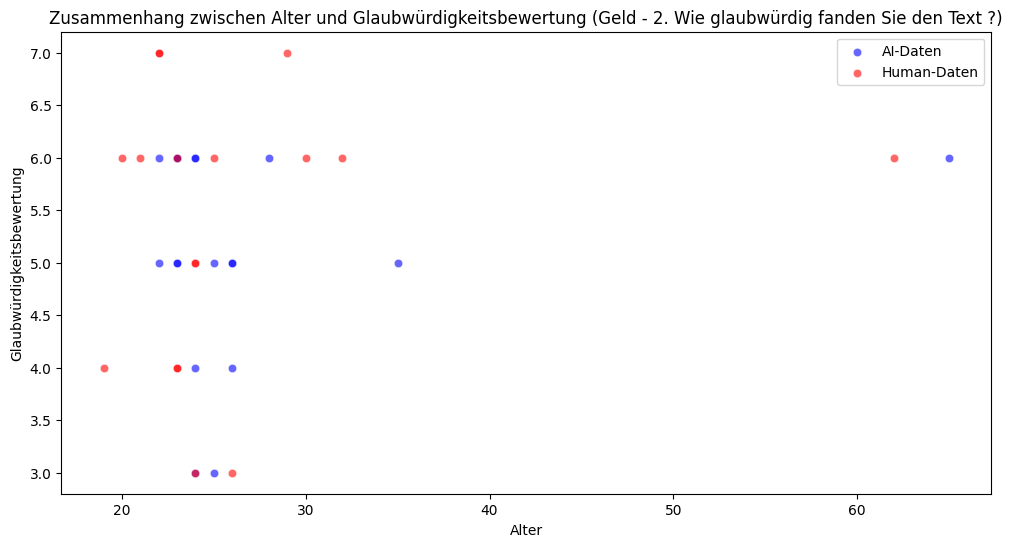

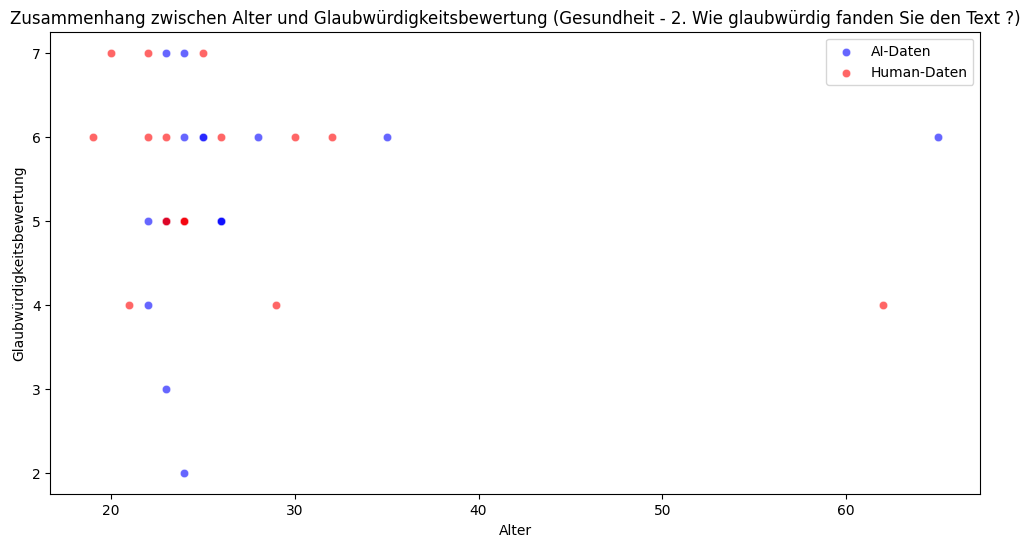

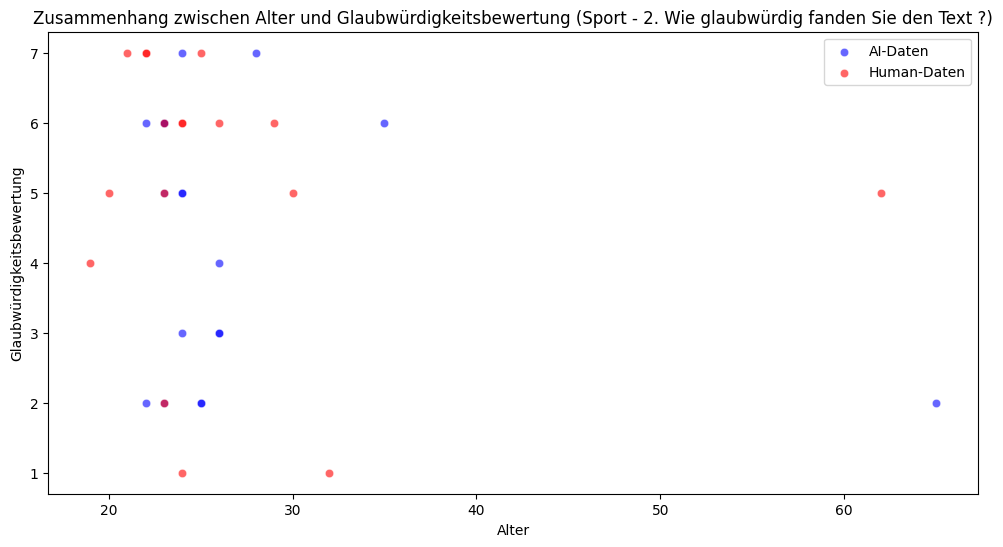

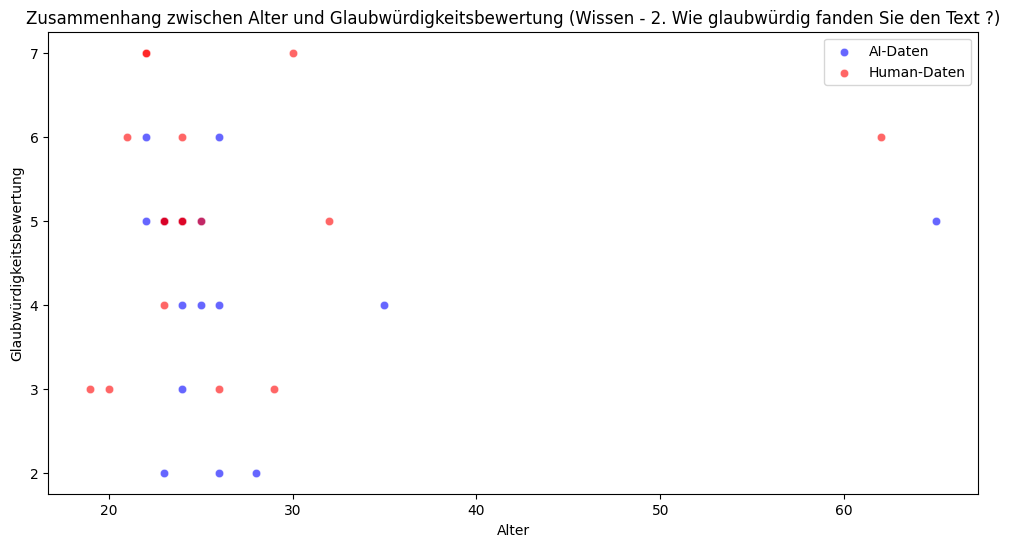

In [33]:
# Scatterplots für jede Glaubwürdigkeitsbewertung
for i, column in enumerate(credibility_columns):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=ai_data[age_column], y=ai_data[column], color="blue", label="AI-Daten", alpha=0.6)
    sns.scatterplot(x=human_data[age_column], y=human_data[column], color="red", label="Human-Daten", alpha=0.6)
    plt.xlabel("Alter")
    plt.ylabel("Glaubwürdigkeitsbewertung")
    plt.title(f"Zusammenhang zwischen Alter und Glaubwürdigkeitsbewertung ({column})")
    plt.legend()
    plt.show()


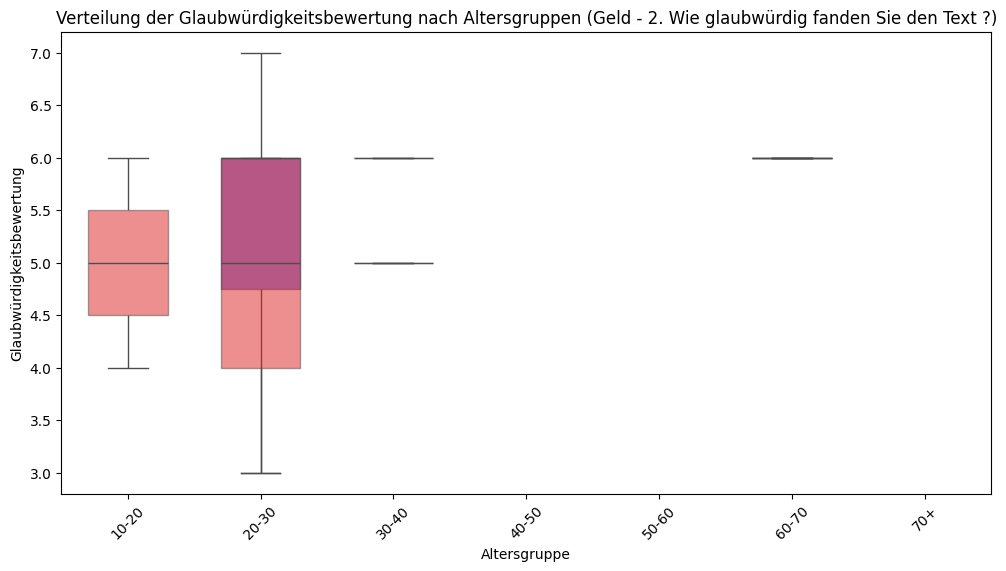

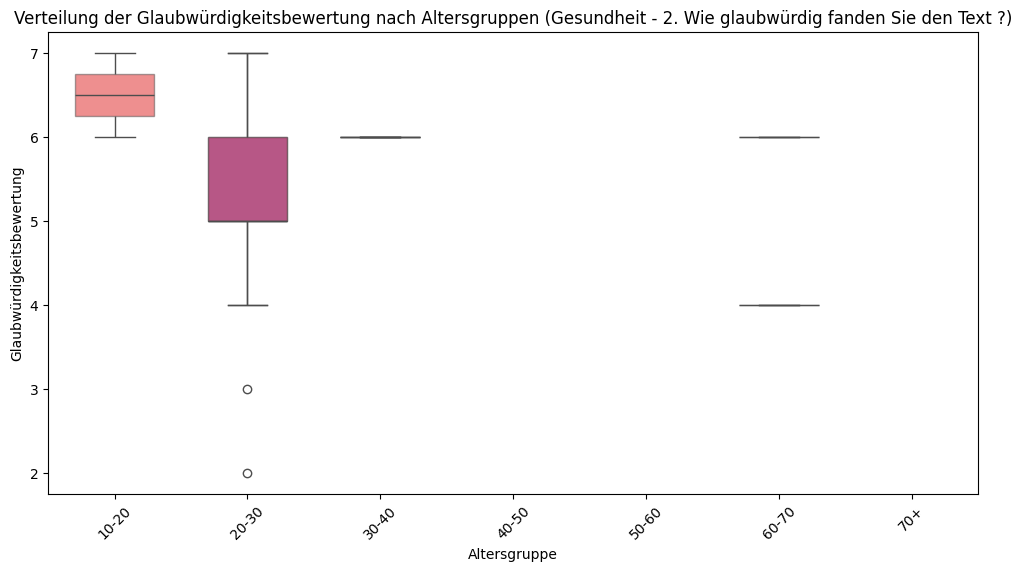

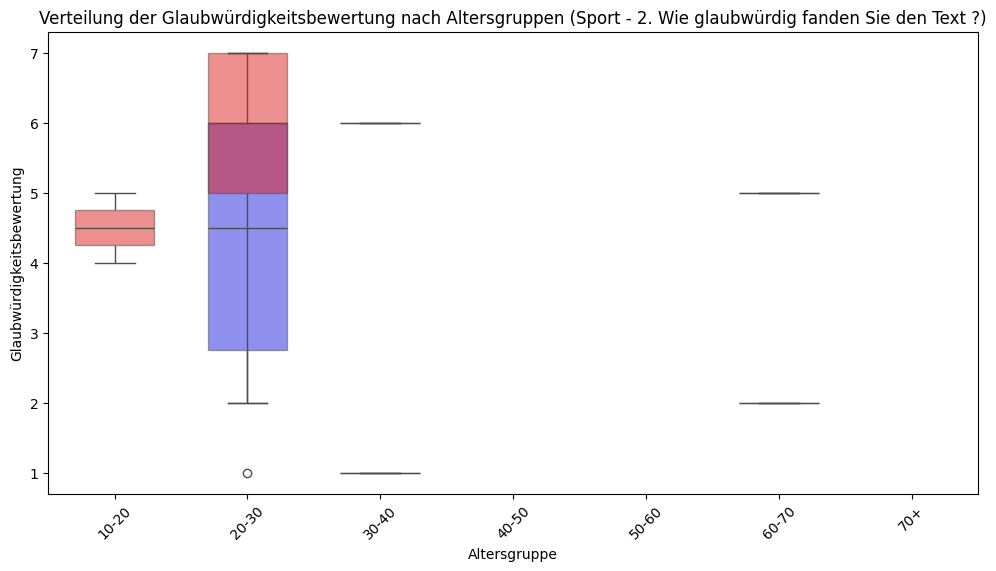

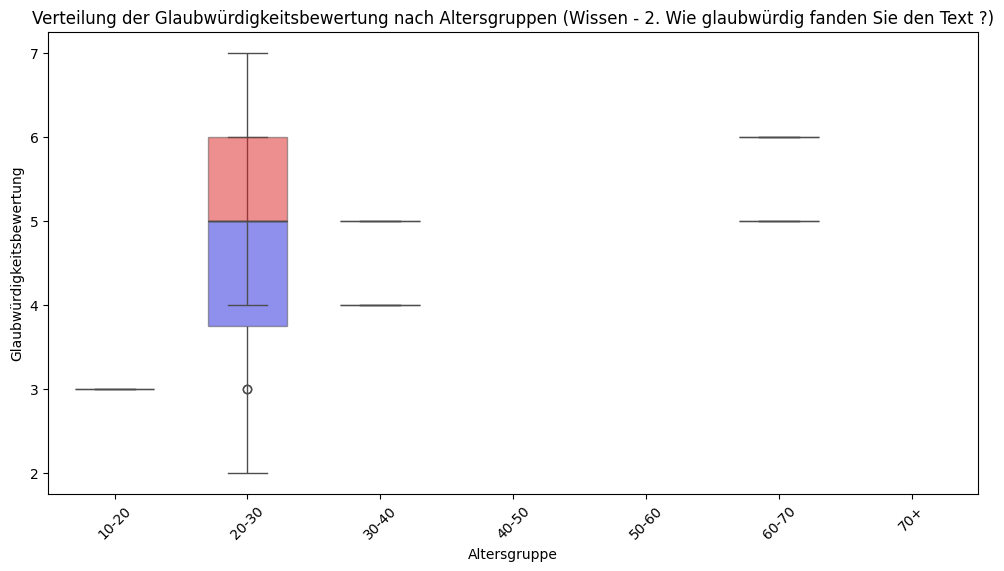

In [34]:
# Boxplots für jede Glaubwürdigkeitsbewertung pro Altersgruppe
for i, column in enumerate(credibility_columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Altersgruppe", y=column, data=ai_data, color="blue", width=0.6, boxprops=dict(alpha=.5))
    sns.boxplot(x="Altersgruppe", y=column, data=human_data, color="red", width=0.6, boxprops=dict(alpha=.5))
    plt.xlabel("Altersgruppe")
    plt.ylabel("Glaubwürdigkeitsbewertung")
    plt.title(f"Verteilung der Glaubwürdigkeitsbewertung nach Altersgruppen ({column})")
    plt.xticks(rotation=45)
    plt.show()
